** Questions **

* What impact does income have on high school graduation rates? 

* In what state are you most likely to graduate, as a high schooler from a low income family? 

In [119]:
#import dependencies
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [120]:
#https://nces.ed.gov/ccd/tables/ACGR_RE_and_characteristics_2015-16.asp

#data1 = pd.read_excel ('../Resources/ACGR_RE_Characteristics_2015-16.xlsx')
#data1_drop = data1.drop(['American Indian / Alaska Native','Asian1','Hawaiian Native/Pacific Islander1','Hispanic', 'Black','White', 'Two or more races1'],axis=1)
#data1.head()

In [134]:
# http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf
# used adobe acrobat pro to convert the PDF to excel format
#multiplied these columns by hundred to reflect the actual precentage

df = pd.read_excel('../Resources/Main_data_AppendixG.xlsx')
df["Overall 2015 \nACGR(%)"]*=100
df["Percent of Low-Income \nStudents in the \nCohort, 2015 (%)"]*=100
df["Estimated \nNon-Low-Income 2015 ACGR(%)"]*=100
df["Low-Income 2015\nACGR(%)"]*=100
df.head()



,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,AL,Alabama*,19.73,89.3,49.5,93.8,84.7,9.1,10.6
1,AK,Alaska,18.28,75.6,35.8,80.6,66.6,14.0,4.2
2,AZ,Arizona,7.94,77.4,39.7,80.2,73.1,7.1,0.8
3,AR,Arkansas,12.14,84.9,49.6,88.1,81.7,6.4,5.8
4,CA,California,15.49,82.0,67.2,90.2,78.0,12.2,3.3


Text(0,0.5,'Estimated Graduation Rates')

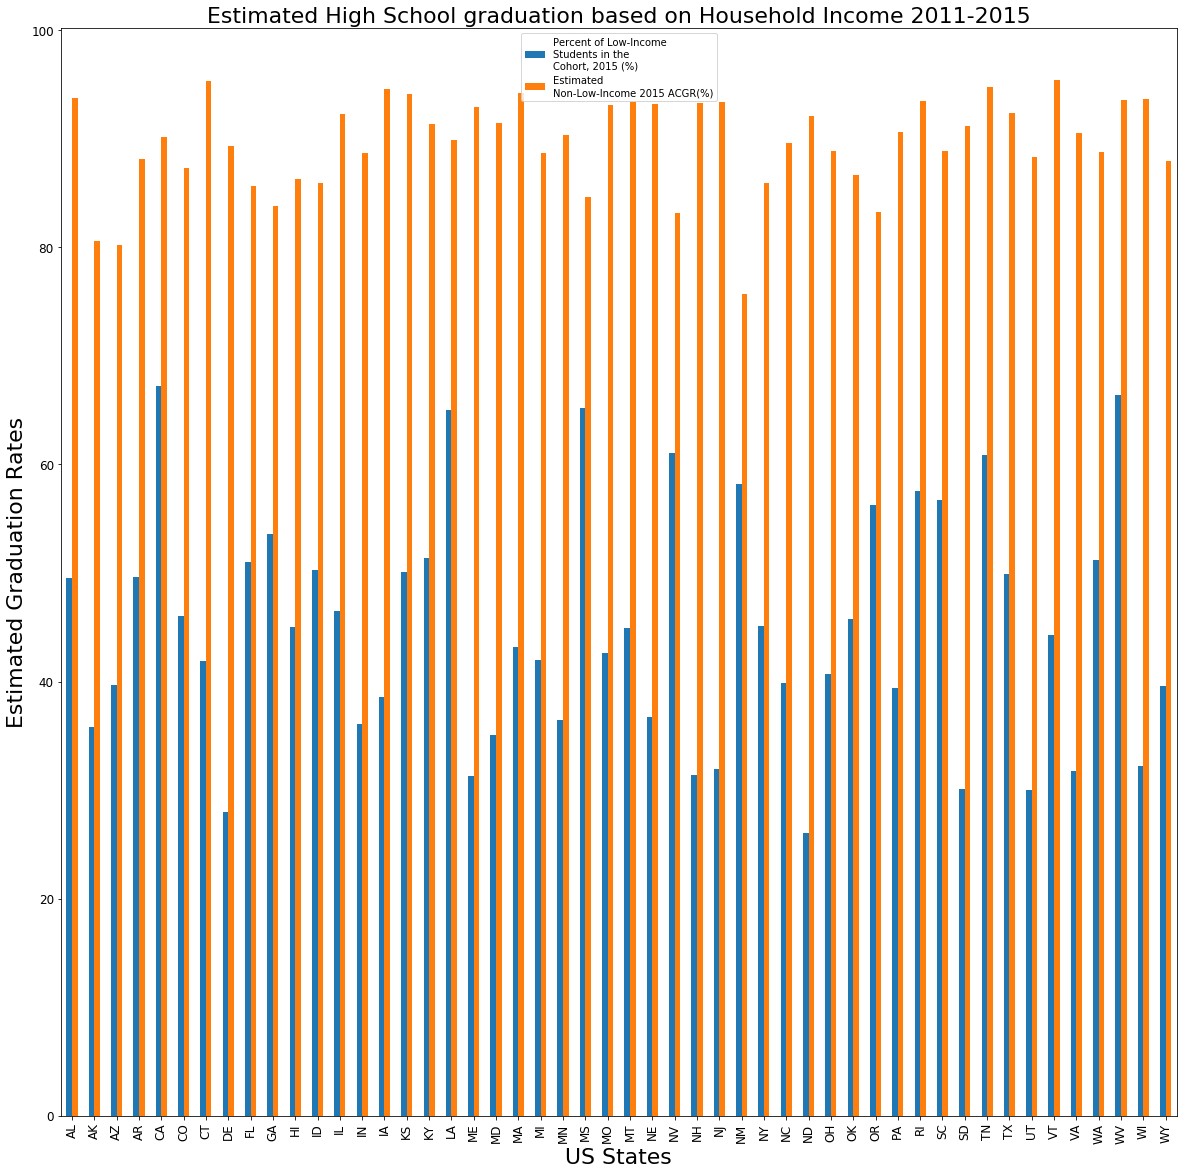

In [124]:
#df.plot(x='Percent of Low-Income \nStudents in the \nCohort, 2015 (%)', y='Estimated \nNon-Low-Income 2015 ACGR(%)')
df.plot(x="Abb",
        y=["Percent of Low-Income \nStudents in the \nCohort, 2015 (%)",
          "Estimated \nNon-Low-Income 2015 ACGR(%)"], kind="bar", figsize=(20,20), fontsize=12, legend = True)

plt.title("Estimated High School graduation based on Household Income 2011-2015", size = 22)
plt.xlabel("US States", size = 22)
plt.ylabel("Estimated Graduation Rates", size = 22)

Text(0,0.5,'Adjusted Cohort Graduation Rate')

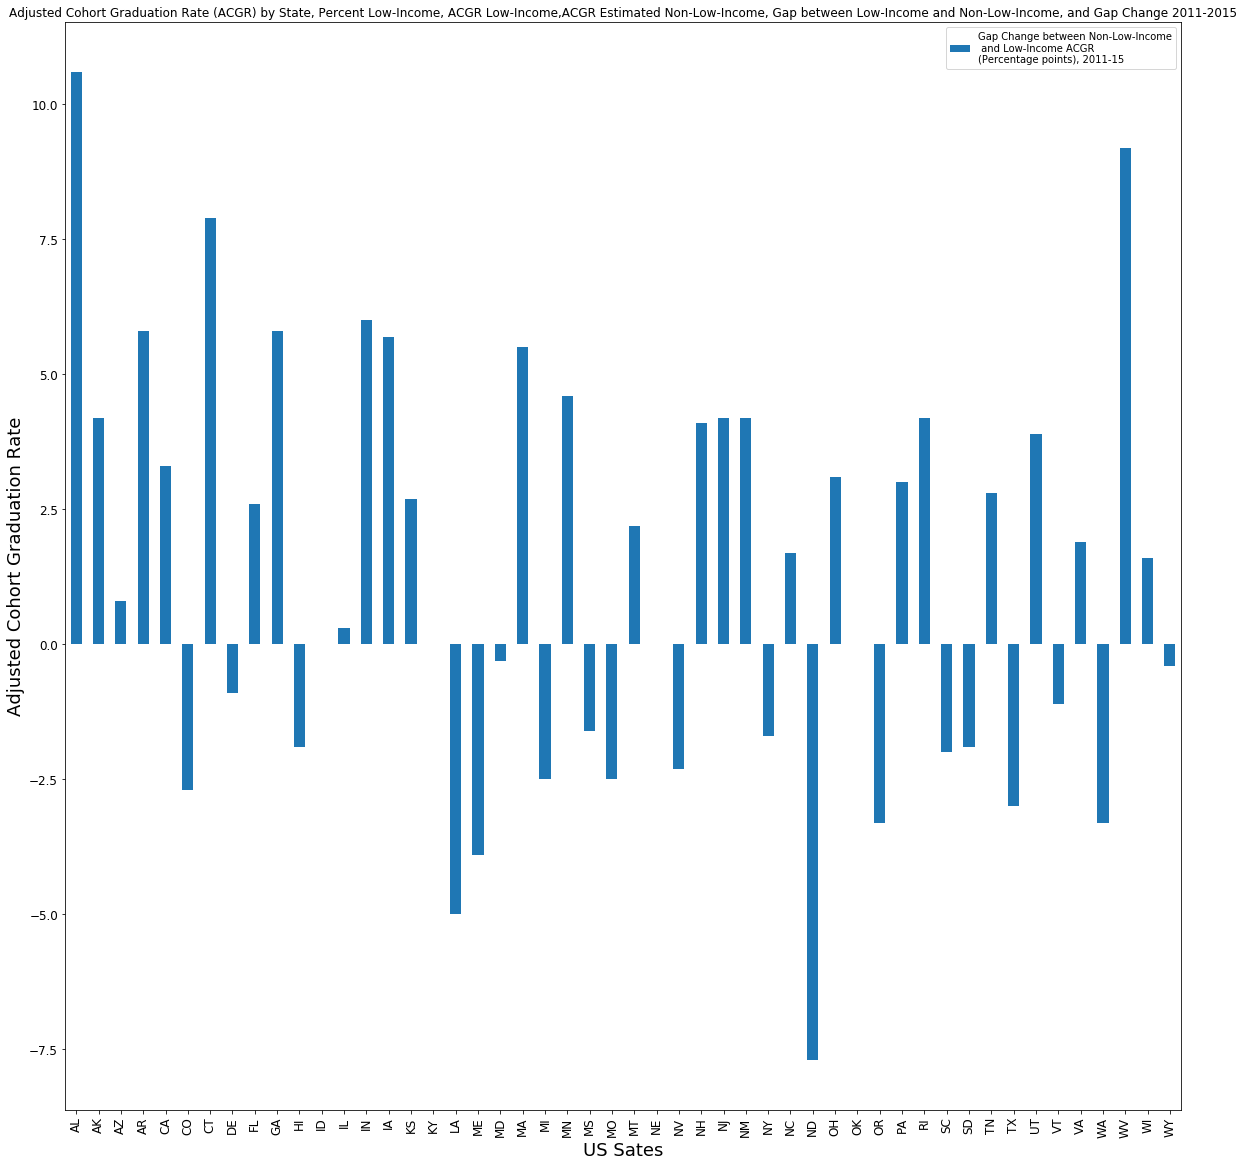

In [130]:
df.plot(x="Abb", y="Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15", kind="bar", figsize=(20,20), fontsize=12)

plt.title('Adjusted Cohort Graduation Rate (ACGR) by State, Percent Low-Income, ACGR Low-Income,ACGR Estimated Non-Low-Income, Gap between Low-Income and Non-Low-Income, and Gap Change 2011-2015')
plt.xlabel('US Sates', size=18)
plt.ylabel('Adjusted Cohort Graduation Rate',size=18)

In [127]:
#Colorscale = [0-50 'Red', 51-60 'yellow', 61-70 'Purple', 71-80 'Blue', 81-100 'Green']
colorscale = [[0,'rgb(210,207,252)'], [1, 'rgb(30,20,174)']]
trc = dict(
  type ='choropleth', locations = df['Abb'], locationmode = 'USA-states', colorscale=colorscale, z=df["Gap between Non-Low Income \nand Low-Income ACGR\n(Percentage Points, 2015"],)
lyt = dict(geo = dict(scope ='usa'))
map = go.Figure(data=[trc],
layout = lyt)

py.iplot(map)